## Import

In [1]:
from numpy import array
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras import layers
import datetime

## Univariate, single step

In [20]:
# split a sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [21]:
# samples = 1
timesteps = 2
features = 1

In [22]:
#generated_series = np.random.normal(size=[samples, timesteps, features])
series = np.array([10, 20, 30, 40, 50, 60])

In [23]:
X, y = split_sequence(series, timesteps)

In [24]:
samples = X.shape[0]

In [25]:
X = X.reshape((samples, timesteps, features))

In [26]:
def create_generator(timesteps, features):
    model = Sequential()
    model.add(layers.LSTM(50, activation='relu',input_shape=(timesteps, features), return_sequences=True))
    model.add(layers.LSTM(50, activation='relu',input_shape=(timesteps, features), return_sequences=False))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
generator = create_generator(timesteps, features)

In [27]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [28]:
generator.fit(X, y, epochs = 200, callbacks=[tensorboard_callback])

Train on 4 samples
Epoch 1/200
4/4 [==============================] - 4s 887ms/sample - loss: 2124.6216
Epoch 2/200
4/4 [==============================] - 0s 30ms/sample - loss: 2118.0278
Epoch 3/200
4/4 [==============================] - 0s 7ms/sample - loss: 2111.2441
Epoch 4/200
4/4 [==============================] - 0s 7ms/sample - loss: 2104.1660
Epoch 5/200
4/4 [==============================] - 0s 7ms/sample - loss: 2096.7864
Epoch 6/200
4/4 [==============================] - 0s 8ms/sample - loss: 2089.0476
Epoch 7/200
4/4 [==============================] - 0s 6ms/sample - loss: 2080.8713
Epoch 8/200
4/4 [==============================] - 0s 7ms/sample - loss: 2072.2302
Epoch 9/200
4/4 [==============================] - 0s 6ms/sample - loss: 2063.0471
Epoch 10/200
4/4 [==============================] - 0s 6ms/sample - loss: 2053.2612
Epoch 11/200
4/4 [==============================] - 0s 6ms/sample - loss: 2042.8326
Epoch 12/200
4/4 [==============================] - 0s 6ms/samp

Epoch 100/200
4/4 [==============================] - 0s 7ms/sample - loss: 17.1183
Epoch 101/200
4/4 [==============================] - 0s 6ms/sample - loss: 16.4135
Epoch 102/200
4/4 [==============================] - 0s 6ms/sample - loss: 15.7936
Epoch 103/200
4/4 [==============================] - 0s 6ms/sample - loss: 15.2006
Epoch 104/200
4/4 [==============================] - 0s 6ms/sample - loss: 14.5890
Epoch 105/200
4/4 [==============================] - 0s 6ms/sample - loss: 13.9326
Epoch 106/200
4/4 [==============================] - 0s 6ms/sample - loss: 13.2259
Epoch 107/200
4/4 [==============================] - 0s 6ms/sample - loss: 12.4832
Epoch 108/200
4/4 [==============================] - 0s 6ms/sample - loss: 11.7337
Epoch 109/200
4/4 [==============================] - 0s 7ms/sample - loss: 11.0147
Epoch 110/200
4/4 [==============================] - 0s 7ms/sample - loss: 10.3628
Epoch 111/200
4/4 [==============================] - 0s 6ms/sample - loss: 9.8058
Epoch

Epoch 200/200
4/4 [==============================] - 0s 7ms/sample - loss: 1.5855


In [20]:
x_input = np.array([50, 60])
x_input = x_input.reshape(1, timesteps, features)
x_input = tf.convert_to_tensor(x_input, dtype=tf.float32)
generator.predict(x_input)

array([[71.80856]], dtype=float32)

###  Tensorboard

In [15]:
%tensorboard --logdir logs/fit

## Multivariate, single step

In [21]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
# samples = 1
timesteps = 2
#features = 1

In [23]:
#generated_series = np.random.normal(size=[samples, timesteps, features])
# define input sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
series = np.hstack((in_seq1, in_seq2, out_seq))

In [24]:
X, y = split_sequence(series, timesteps)

In [25]:
samples = X.shape[0]
features = X.shape[2]

In [26]:
X = X.reshape((samples, timesteps, features))

In [27]:
def create_generator(timesteps, features):
    model = Sequential()
    model.add(layers.LSTM(50, activation='relu',input_shape=(timesteps, features), return_sequences=True))
    model.add(layers.LSTM(50, activation='relu',input_shape=(timesteps, features), return_sequences=False))
    model.add(layers.Dense(features))
    model.compile(loss='mse', optimizer='adam')
    return model
generator = create_generator(timesteps, features)

In [31]:
#generator.fit(X, y, epochs = 200)

In [29]:
x_input = np.array([[80,85,165], [90,95,185]])
x_input = x_input.reshape((1, timesteps, features))
x_input = tf.convert_to_tensor(x_input, dtype=tf.float32)
generator.predict(x_input)

array([[100.87643, 105.61889, 205.69478]], dtype=float32)

## Univariate, multi-step

In [33]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [34]:
# samples = 1
timesteps = 2
features = 1

In [35]:
#generated_series = np.random.normal(size=[samples, timesteps, features])
# define input sequence
series = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [36]:
X, y = split_sequence(series, timesteps, timesteps)

In [37]:
samples = X.shape[0]
#features = X.shape[2]

In [38]:
X = X.reshape((samples, timesteps, features))

In [39]:
def create_generator(timesteps, features):
    model = Sequential()
    model.add(layers.LSTM(50, activation='relu',input_shape=(timesteps, features), return_sequences=True))
    model.add(layers.LSTM(50, activation='relu',input_shape=(timesteps, features), return_sequences=False))
    model.add(layers.Dense(timesteps))
    model.compile(loss='mse', optimizer='adam')
    return model
generator = create_generator(timesteps, features)

In [40]:
generator.fit(X, y, epochs = 200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 2s 412ms/sample - loss: 3902.3118
Epoch 2/200
6/6 [==============================] - 0s 688us/sample - loss: 3887.4363
Epoch 3/200
6/6 [==============================] - 0s 651us/sample - loss: 3872.4832
Epoch 4/200
6/6 [==============================] - 0s 742us/sample - loss: 3857.3650
Epoch 5/200
6/6 [==============================] - 0s 770us/sample - loss: 3842.0339
Epoch 6/200
6/6 [==============================] - 0s 756us/sample - loss: 3826.3809
Epoch 7/200
6/6 [==============================] - 0s 766us/sample - loss: 3810.2820
Epoch 8/200
6/6 [==============================] - 0s 716us/sample - loss: 3793.5779
Epoch 9/200
6/6 [==============================] - 0s 776us/sample - loss: 3776.0828
Epoch 10/200
6/6 [==============================] - 0s 802us/sample - loss: 3757.7112
Epoch 11/200
6/6 [==============================] - 0s 690us/sample - loss: 3738.3230
Epoch 12/200
6/6 [==========================

Epoch 97/200
6/6 [==============================] - 0s 700us/sample - loss: 49.1024
Epoch 98/200
6/6 [==============================] - 0s 731us/sample - loss: 46.1056
Epoch 99/200
6/6 [==============================] - 0s 830us/sample - loss: 43.3544
Epoch 100/200
6/6 [==============================] - 0s 701us/sample - loss: 40.7625
Epoch 101/200
6/6 [==============================] - 0s 728us/sample - loss: 38.2032
Epoch 102/200
6/6 [==============================] - 0s 699us/sample - loss: 35.6561
Epoch 103/200
6/6 [==============================] - 0s 786us/sample - loss: 33.1916
Epoch 104/200
6/6 [==============================] - 0s 707us/sample - loss: 30.8862
Epoch 105/200
6/6 [==============================] - 0s 728us/sample - loss: 28.7730
Epoch 106/200
6/6 [==============================] - 0s 666us/sample - loss: 26.8418
Epoch 107/200
6/6 [==============================] - 0s 737us/sample - loss: 25.0648
Epoch 108/200
6/6 [==============================] - 0s 681us/sample

Epoch 195/200
6/6 [==============================] - 0s 807us/sample - loss: 1.0506
Epoch 196/200
6/6 [==============================] - 0s 898us/sample - loss: 1.0292
Epoch 197/200
6/6 [==============================] - 0s 911us/sample - loss: 1.0084
Epoch 198/200
6/6 [==============================] - 0s 855us/sample - loss: 0.9882
Epoch 199/200
6/6 [==============================] - 0s 738us/sample - loss: 0.9686
Epoch 200/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.9495


In [41]:
x_input = np.array([80, 90])
x_input = x_input.reshape((1, timesteps, features))
x_input = tf.convert_to_tensor(x_input, dtype=tf.float32)
generator.predict(x_input)

array([[104.05014 , 117.013016]], dtype=float32)

## Multivariate, multi-step

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# samples = 1
timesteps = 2
#features = 1

In [4]:
#generated_series = np.random.normal(size=[samples, timesteps, features])
# define input sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
series = np.hstack((in_seq1, in_seq2, out_seq))

In [5]:
X, y = split_sequences(series, timesteps, timesteps)

In [6]:
samples = X.shape[0]
features = X.shape[2]

In [18]:
def create_generator(timesteps, features):
    model = Sequential()
    model.add(layers.LSTM(100, activation='relu',input_shape=(timesteps, features), return_sequences=True))
    model.add(layers.LSTM(100, activation='relu',input_shape=(timesteps, features), return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(features)))
    model.compile(loss='mse', optimizer='adam')
    return model
generator = create_generator(timesteps, features)

In [19]:
generator.fit(X, y, epochs = 500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 3s 574ms/sample - loss: 8376.3838
Epoch 2/500
6/6 [==============================] - 0s 2ms/sample - loss: 8296.1455
Epoch 3/500
6/6 [==============================] - 0s 2ms/sample - loss: 8212.7383
Epoch 4/500
6/6 [==============================] - 0s 2ms/sample - loss: 8126.3901
Epoch 5/500
6/6 [==============================] - 0s 2ms/sample - loss: 8035.8120
Epoch 6/500
6/6 [==============================] - 0s 2ms/sample - loss: 7938.4077
Epoch 7/500
6/6 [==============================] - 0s 2ms/sample - loss: 7834.2280
Epoch 8/500
6/6 [==============================] - 0s 2ms/sample - loss: 7719.3491
Epoch 9/500
6/6 [==============================] - 0s 2ms/sample - loss: 7591.9897
Epoch 10/500
6/6 [==============================] - 0s 2ms/sample - loss: 7450.5586
Epoch 11/500
6/6 [==============================] - 0s 2ms/sample - loss: 7293.0054
Epoch 12/500
6/6 [==============================] - 0s 2ms/sampl

6/6 [==============================] - 0s 2ms/sample - loss: 30.4236
Epoch 100/500
6/6 [==============================] - 0s 2ms/sample - loss: 29.8690
Epoch 101/500
6/6 [==============================] - 0s 2ms/sample - loss: 28.9749
Epoch 102/500
6/6 [==============================] - 0s 2ms/sample - loss: 27.6837
Epoch 103/500
6/6 [==============================] - 0s 2ms/sample - loss: 26.5449
Epoch 104/500
6/6 [==============================] - 0s 2ms/sample - loss: 25.7590
Epoch 105/500
6/6 [==============================] - 0s 2ms/sample - loss: 24.9636
Epoch 106/500
6/6 [==============================] - 0s 2ms/sample - loss: 24.0504
Epoch 107/500
6/6 [==============================] - 0s 2ms/sample - loss: 23.1302
Epoch 108/500
6/6 [==============================] - 0s 2ms/sample - loss: 22.1310
Epoch 109/500
6/6 [==============================] - 0s 2ms/sample - loss: 21.0636
Epoch 110/500
6/6 [==============================] - 0s 2ms/sample - loss: 20.0806
Epoch 111/500
6/6 

Epoch 199/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.7345
Epoch 200/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.7196
Epoch 201/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.7050
Epoch 202/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6910
Epoch 203/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6775
Epoch 204/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6644
Epoch 205/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6518
Epoch 206/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6395
Epoch 207/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6278
Epoch 208/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6163
Epoch 209/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.6052
Epoch 210/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.5945
Epoch 211/500
6/

Epoch 299/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2149
Epoch 300/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2120
Epoch 301/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2106
Epoch 302/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2082
Epoch 303/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2065
Epoch 304/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2045
Epoch 305/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2027
Epoch 306/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.2009
Epoch 307/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.1988
Epoch 308/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.1973
Epoch 309/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.1951
Epoch 310/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.1938
Epoch 311/500
6/

Epoch 399/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0875
Epoch 400/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0867
Epoch 401/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0859
Epoch 402/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0850
Epoch 403/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0842
Epoch 404/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0834
Epoch 405/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0825
Epoch 406/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0818
Epoch 407/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0809
Epoch 408/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0801
Epoch 409/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0793
Epoch 410/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0786
Epoch 411/500
6/

Epoch 499/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0366
Epoch 500/500
6/6 [==============================] - 0s 2ms/sample - loss: 0.0362


In [37]:
x_input = np.array([[80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, timesteps, features))
x_input = tf.convert_to_tensor(x_input, dtype=tf.float32)
x_output = generator.predict(x_input)

In [21]:
import matplotlib.pyplot as plt

In [43]:
x_input

<tf.Tensor: id=9204, shape=(1, 2, 3), dtype=float32, numpy=
array([[[ 80.,  85., 165.],
        [ 90.,  95., 185.]]], dtype=float32)>

In [44]:
x_output

array([[[102.15553 , 107.98317 , 209.66095 ],
        [110.755585, 117.51883 , 229.3837  ]]], dtype=float32)

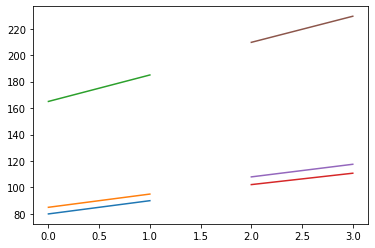

In [53]:
plt.plot(x_input[0]);
t_o = [2,3]
plt.plot(t_o, x_output[0])

In [49]:
t_o = [1,2]